In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


In [3]:
# 导入数据集
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
# 数据的归一化：x = (x-u)/std u:均值 std:方差
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    # x_train : [none , 28, 28]
    x_train.astype(np.float32).reshape(-1,1)
).reshape(-1,28,28)

x_valid_scaled = scaler.transform(
    # x_train : [none , 28, 28]
    x_valid.astype(np.float32).reshape(-1,1)
).reshape(-1,28,28)

x_test_scaled = scaler.transform(
    # x_train : [none , 28, 28]
    x_test.astype(np.float32).reshape(-1,1)
).reshape(-1,28,28)

print(np.max(x_train_scaled),np.min(x_train_scaled))




2.0231433 -0.8105136


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])




Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4598 - accuracy: 0.8325 - val_loss: 0.3672 - val_accuracy: 0.8676
Epoch 2/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3483 - accuracy: 0.8709 - val_loss: 0.3338 - val_accuracy: 0.8784
Epoch 3/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3154 - accuracy: 0.8824 - val_loss: 0.3320 - val_accuracy: 0.8750
Epoch 4/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.2927 - accuracy: 0.8890 - val_loss: 0.3242 - val_accuracy: 0.8824
Epoch 5/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.2725 - accuracy: 0.8971 - val_loss: 0.3231 - val_accuracy: 0.8840
Epoch 6/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.2573 - accuracy: 0.9030 - val_loss: 0.3063 - val_accuracy: 0.8890
Epoch 7/10
55000/55000 [===========================

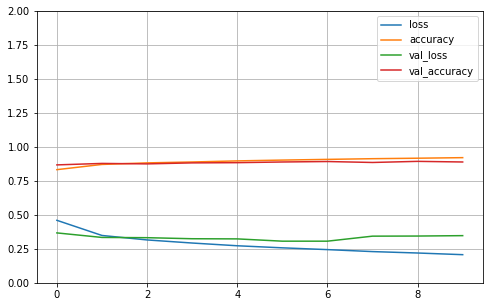

In [7]:
# 会使用三个callback：Tensorboard、earlystopping、ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)
]
history = model.fit(x_train_scaled,y_train,epochs=10,
            validation_data=(x_valid_scaled,y_valid),
            callbacks = callbacks)

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()

plot_learning_curves(history)

